# Import Packages

In [183]:
import numpy as np
import pandas as pd #data processing analysis
import datetime

%matplotlib inline
import matplotlib.pyplot as plt # Interface for chart like MatLab 
import matplotlib.dates as mdates
import seaborn as sns   #visualize Dataframes of pandas

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10)) #size of background of chart 
plt.rc('lines', markersize=4)

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf   #yahoo finance dât of stock

from sklearn.linear_model import LinearRegression

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


# Get a sample stock price from 2019-01-01 to today

In [184]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-05-07')
data.head() #print head of data 
data.tail()
# giá mở cửa/cao nhất/thấp nhất/giá đóng cửa/../ khối lượng cổ phiếu

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-30,289.959991,294.529999,288.350006,293.799988,293.006836,45766000
2020-05-01,286.250000,299.000000,285.850006,289.070007,288.289612,60154200
2020-05-04,289.170013,293.690002,286.320007,293.160004,292.368561,33392000
2020-05-05,295.059998,301.000000,294.459991,297.559998,296.756683,36937800
2020-05-06,300.459991,303.239990,298.869995,300.630005,299.818390,35583400


# Extract the Close price column to plot

In [185]:
df = pd.DataFrame(data, columns=['Close']) #create dataframe only use close values
df = df.reset_index()
df.isna().values.any() # check for NaN (Not a Number)

False

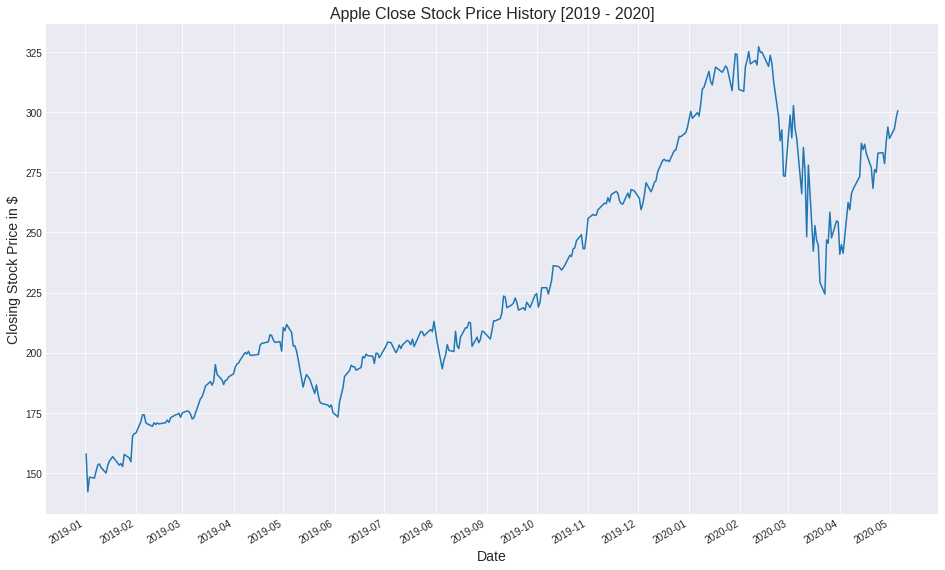

In [186]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year #Nomarlly space between tick in plot is 3 months
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes 
fig, ax = plt.subplots() #2 plot 
ax.plot(df['Date'], df['Close']) #axes plot show the data of date and close values of that day

# Format the ticks
ax.xaxis.set_major_locator(months) # set tick due to month
ax.xaxis.set_major_formatter(dateFmt) #display of time in chart 

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate() # Adjust the orientation of the date display

# Show plot
plt.show()

# Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance


In [187]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-05-07'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [188]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999


In [189]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='Date', length=339, freq=None)

In [190]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals') #chuyển data từ frames thành dạng dài nối liền nhau
df_plot.isna().values.any()

False

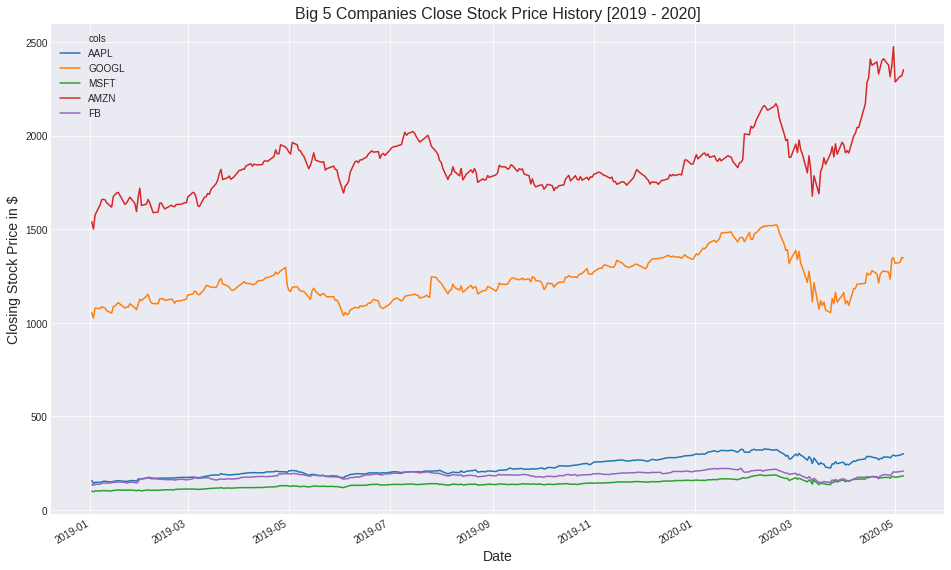

In [191]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot) #x cho ngày, y theo giá trị, màu theo tên biến(key)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Create X, y matrices for regression


Use history = number of days before prediction date


In [0]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

# Create a Linear Regression Model to predict stock price

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

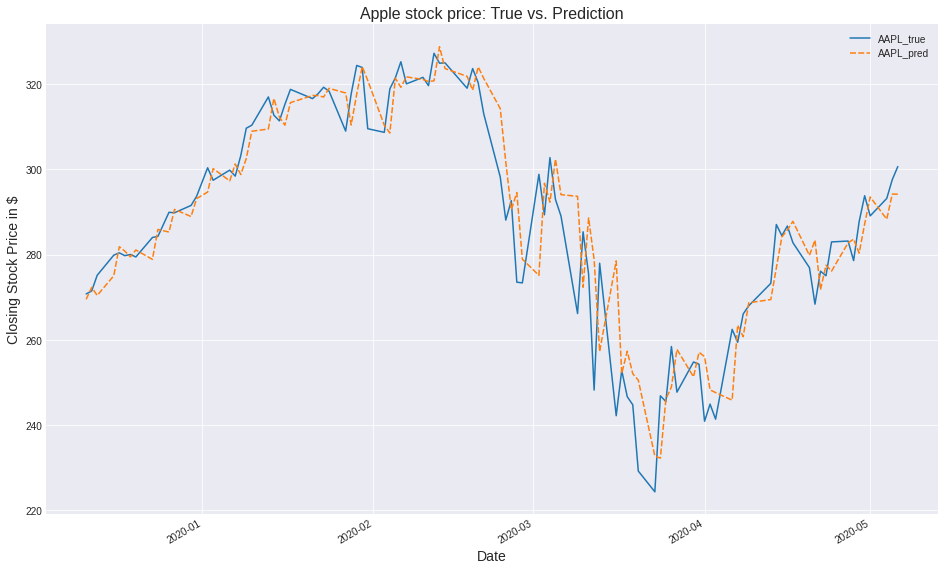

In [194]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

for i in range(5):
    print( df.columns[i], mean_relative_error(y_test[:,i], ypred[:,i]))

AAPL 0.023607594376207
GOOGL 0.022099820643542954
MSFT 0.025212047191272905
AMZN 0.020127880038046924
FB 0.035487475231559346


In [196]:
clf_confidence = clf.score (X_test, y_test)
print ("clf confidance:", clf_confidence) 

clf confidance: 0.914595064327978


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


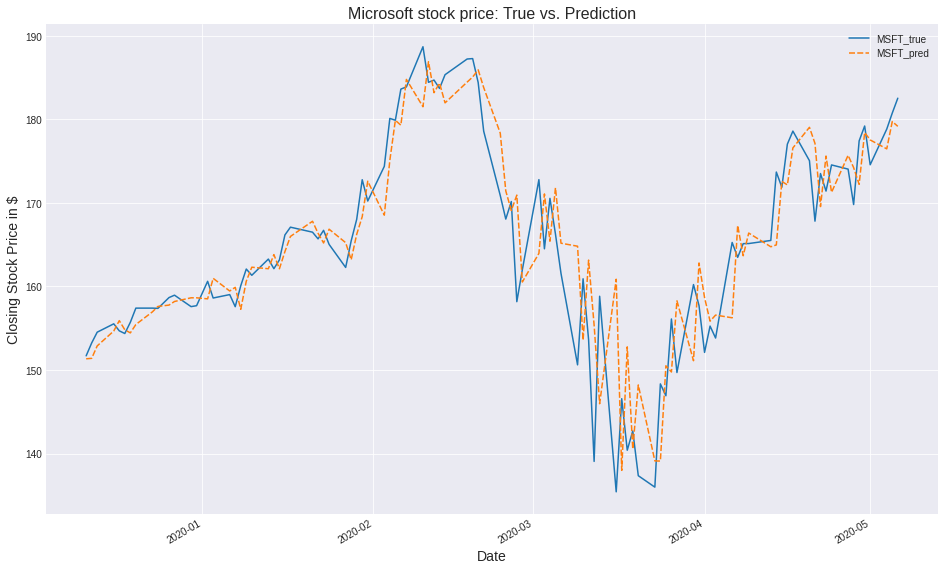

In [197]:
df_plot = pd.DataFrame({"MSFT_true": y_test[:,2], 'MSFT_pred': ypred[:,2]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Microsoft stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Exercise



1.   Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price)
2.   Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance


## 1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price)

## 2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )

In [0]:
import math
import array as arr

#Caculate the average of array
def mean(data):
    return sum(data)/len(data)

#Caculate the diviration and add to arr
def dev(data):
    arr = []
    arr.append([point - mean(data) for point in data])
    return arr

#Caculate the Numerator of correlation formula
def TS(data1, data2):
    arr1 = []
    arr1.append([point - mean(data1) for point in data1])
    arr2 = []
    arr2.append([point - mean(data2) for point in data2])
    arr3 = []
    arr3 = np.multiply(arr1, arr2) 
    #for i in range(0, len(data1)):
    #  sum1 += arr1*arr2
    return np.sum(arr3)
 
#Caculate the Denominator of correlation formula
def MS(data1, data2):
  variance1 = sum([(point - mean(data1))**2 for point in data1])
  variance2 = sum([(point - mean(data2))**2 for point in data2])
  return math.sqrt(variance1*variance2)

#Formula of Correlation 
def corr(data1,data2):
    return TS(data1, data2)/MS(data1, data2)

def eval_corr(value):
    if value >= 0.7 and value <= 1:
        return print("The two stocks have a strong positive correlation, that is, increase and decrease together")
    if value < 0.7 and value >= 0.2:
        return print("Two stocks have a weak positive correlation, that is, they increase and decrease together but not significantly")
    if value < 0.2 and value >=-0.2: 
        return print("Two stocks have no correlation, that is, they do not depend on each")
    if value < -0.2 and value >= -0.7:
        return print("Two stocks have a weak negative correlation, that is, they increase or decrease in opposite directions but not significantly")
    if value <-0.7 and value >= -1:
        return print("Two stocks have a strong negative correlation, that is, they increase or decrease in opposite directions")
    else: 
        return print("None defined")

Apple vs Google

In [199]:
def get_close_stock_price(codes, start_date='2020-01-01', end_date='2020-03-01'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df = get_close_stock_price(['AAPL', 'GOOGL'])
df.to_csv('close_price_appl_googl.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [200]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals') #chuyển data từ frames thành dạng dài nối liền nhau
df_plot.isna().values.any()

False

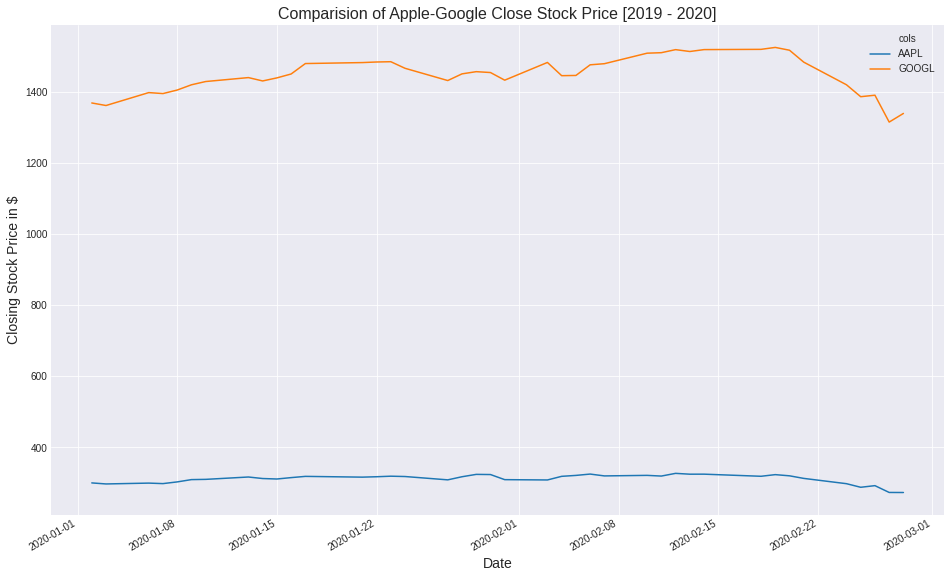

In [201]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot) #x cho ngày, y theo giá trị, màu theo tên biến(key)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Comparision of Apple-Google Close Stock Price [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

Visualy, the close stock price of Apple and Google are quite correlated

In [0]:
#Get data from col to array
arrAp = df[['AAPL']].to_numpy()                 
arrG = df[['GOOGL']].to_numpy()

In [203]:
print(corr(arrAp, arrG))

0.8827928573482906


In [204]:
print(eval_corr(corr(arrAp,arrG)))

The two stocks have a strong positive correlation, that is, increase and decrease together
None


Amazon vs Google

In [205]:
def get_close_stock_price(codes, start_date='2020-01-01', end_date='2020-03-01'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df = get_close_stock_price(['AMZN', 'GOOGL'])
df.to_csv('close_price_amzn_googl.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [206]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals') #chuyển data từ frames thành dạng dài nối liền nhau
df_plot.isna().values.any()

False

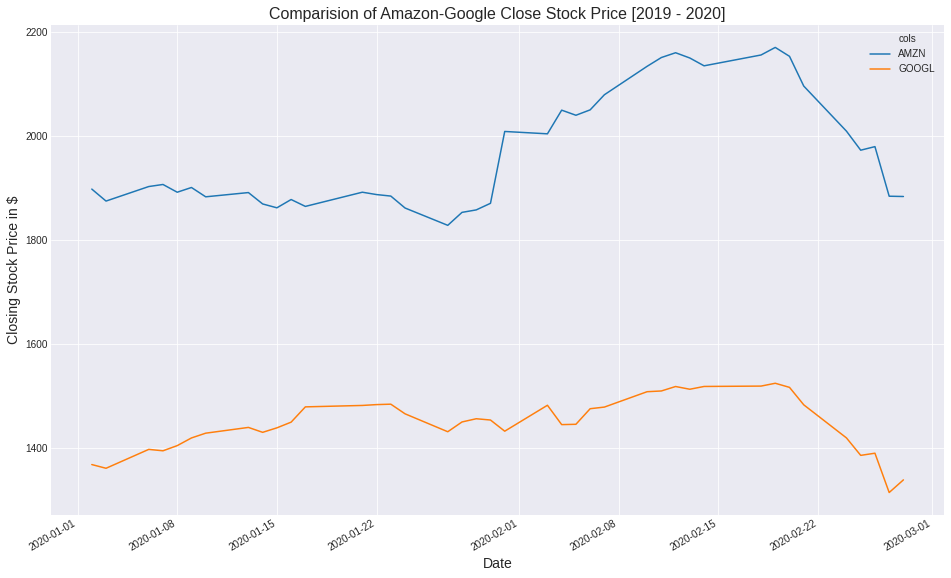

In [207]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot) #x cho ngày, y theo giá trị, màu theo tên biến(key)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Comparision of Amazon-Google Close Stock Price [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

Visualy, the close stock price of Amazon and Google are quite correlated

In [0]:
#Get data from col to array
arrAm = df[['AMZN']].to_numpy()                 
arrG = df[['GOOGL']].to_numpy()

In [209]:
print(corr(arrAm, arrG))

0.625579484743861


In [210]:
print(eval_corr(corr(arrAm,arrG)))

Two stocks have a weak positive correlation, that is, they increase and decrease together but not significantly
None


Apple vs Facebook

In [211]:
def get_close_stock_price(codes, start_date='2020-01-01', end_date='2020-03-01'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df = get_close_stock_price(['AAPL', 'FB'])
df.to_csv('close_price_aapl_fb.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [212]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals') #chuyển data từ frames thành dạng dài nối liền nhau
df_plot.isna().values.any()

False

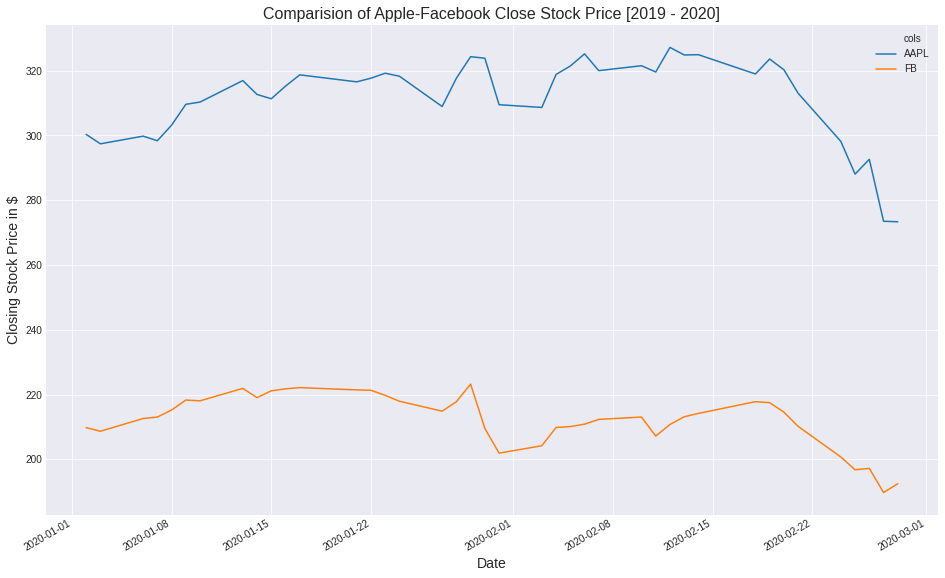

In [213]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot) #x cho ngày, y theo giá trị, màu theo tên biến(key)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Comparision of Apple-Facebook Close Stock Price [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

Visualy, the close stock price of Apple and Facebook are quite correlated

In [0]:
#Get data from col to array
arrAp = df[['AAPL']].to_numpy()                 
arrF = df[['FB']].to_numpy()

In [215]:
print(corr(arrAp, arrF))

0.7038685366202366


In [216]:
print(eval_corr(corr(arrAm,arrG)))

Two stocks have a weak positive correlation, that is, they increase and decrease together but not significantly
None


Apple vs Microsoft

In [217]:
def get_close_stock_price(codes, start_date='2020-01-01', end_date='2020-03-01'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df = get_close_stock_price(['AAPL', 'MSFT'])
df.to_csv('close_price_apl_msft.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [218]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals') #chuyển data từ frames thành dạng dài nối liền nhau
df_plot.isna().values.any()

False

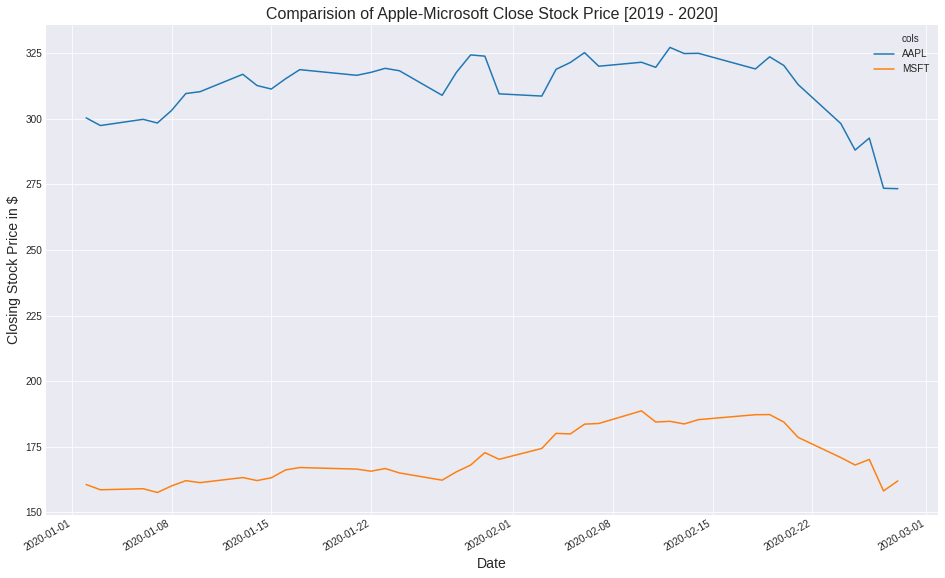

In [219]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot) #x cho ngày, y theo giá trị, màu theo tên biến(key)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Comparision of Apple-Microsoft Close Stock Price [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

Visualy, the close stock price of Apple and Microsoft are quite correlated

In [0]:
#Get data from col to array
arrAp = df[['AAPL']].to_numpy()                 
arrM = df[['MSFT']].to_numpy()

In [221]:
print(corr(arrAp, arrM))

0.6075668803647021


In [222]:
print(eval_corr(corr(arrAp,arrM)))

Two stocks have a weak positive correlation, that is, they increase and decrease together but not significantly
None


## 3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )

### get_feature use sqrt

In [223]:
def get_close_stock_price(codes, start_date='2019-01-01', end_date='2020-05-07'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
                   # đổi lại frame hiển thị data, đổi tên các cột thành các key(tên loại stock)     
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
            #tương tự join trong sql nối các bảng với các key khác nhau thành 1 bảng
    return df

df3 = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df3.to_csv('close_price_big_5_3.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [224]:
df3 = pd.read_csv('close_price_big_5_3.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df3.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999


In [225]:
df3.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='Date', length=339, freq=None)

In [0]:
def get_feature(raw_df):
    return (np.sqrt(raw_df.values)).reshape(-1)

def create_Xy2(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) ) 
        X.append( get_feature(df.iloc[row_idx-history:row_idx,:]) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X3,y3,dates3 = create_Xy2(df3, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train3 = len(y3) * 7 // 10
X_train3, y_train3, dates_train3, X_test3, y_test3, dates_test3 = X3[:n_train3], y3[:n_train3], dates3[:n_train3], X3[n_train3:], y3[n_train3:], dates3[n_train3:]

In [0]:
clf3 = LinearRegression()
clf3.fit(X_train3, y_train3)
ypred3 = clf3.predict(X_test3)

In [228]:
clf3_confidence = clf3.score (X_test3, y_test3)
print ("clf3 confidance:", clf3_confidence) 

clf3 confidance: 0.9048761704953088


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [229]:
for i in range(5):
    print( df3.columns[i], mean_relative_error(y_test3[:,i], ypred3[:,i]))

AAPL 0.03350345544733472
GOOGL 0.02430502352421663
MSFT 0.02999347358682835
AMZN 0.02142293302627319
FB 0.036575359268381694


### get_feature use log

In [0]:
def get_feature2(raw_df):
    return (np.log(raw_df.values)).reshape(-1)

def create_Xy3(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) ) 
        X.append( get_feature2(df.iloc[row_idx-history:row_idx,:]) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X6,y6,dates6 = create_Xy3(df3, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train6 = len(y6) * 7 // 10
X_train6, y_train6, dates_train6, X_test6, y_test6, dates_test6 = X6[:n_train6], y6[:n_train6], dates6[:n_train6], X6[n_train6:], y6[n_train6:], dates6[n_train6:]

In [0]:
clf6 = LinearRegression()
clf6.fit(X_train6, y_train6)
ypred6 = clf6.predict(X_test6)

In [232]:
clf6_confidence = clf6.score (X_test6, y_test6)
print ("clf6 confidance:", clf6_confidence) 

clf6 confidance: 0.8776964687734843


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [233]:
for i in range(5):
    print( df3.columns[i], mean_relative_error(y_test6[:,i], ypred6[:,i]))

AAPL 0.049454428136349184
GOOGL 0.027445991916067
MSFT 0.040438231608592994
AMZN 0.024033948524282346
FB 0.03937685182310005


## 4. Build a linear regression model to predict future stock price

### Train Apple stock use Open and Close

In [0]:
df4 = pd.DataFrame(data, columns=['Open', 'Close'])
df4.to_csv('oc_apple.csv')

In [235]:
df4 = pd.read_csv('oc_apple.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df4.head()

,Open,Close
Date,,
2019-01-02,154.889999,157.919998
2019-01-03,143.979996,142.190002
2019-01-04,144.529999,148.259995
2019-01-07,148.699997,147.929993
2019-01-08,149.559998,150.750000


In [0]:
X4,y4,dates4 = create_Xy(df4, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train4 = len(y4) * 7 // 10
X_train4, y_train4, dates_train4, X_test4, y_test4, dates_test4 = X4[:n_train4], y4[:n_train4], dates4[:n_train4], X4[n_train4:], y4[n_train4:], dates4[n_train4:]

In [0]:
clf4 = LinearRegression()
clf4.fit(X_train4, y_train4)
ypred4 = clf4.predict(X_test4)

In [238]:
clf4_confidence = clf4.score (X_test4, y_test4)
print ("clf4 confidance:", clf4_confidence) 

clf4 confidance: 0.885123384346322


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### Predict Apple Stock using its Close High Low Open

In [0]:
df5 = pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close'])
df5.to_csv('ohlc_apple.csv')

In [240]:
df5 = pd.read_csv('ohlc_apple.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df5.head()

,Open,High,Low,Close
Date,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998
2019-01-03,143.979996,145.720001,142.000000,142.190002
2019-01-04,144.529999,148.550003,143.800003,148.259995
2019-01-07,148.699997,148.830002,145.899994,147.929993
2019-01-08,149.559998,151.820007,148.520004,150.750000


In [0]:
X5,y5,dates5 = create_Xy(df5, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train5 = len(y5) * 7 // 10
X_train5, y_train5, dates_train5, X_test5, y_test5, dates_test5 = X5[:n_train5], y5[:n_train5], dates5[:n_train5], X5[n_train5:], y5[n_train5:], dates5[n_train5:]

In [0]:
clf5 = LinearRegression()
clf5.fit(X_train5, y_train5)
ypred5 = clf5.predict(X_test5)

In [243]:
clf5_confidence = clf5.score (X_test5, y_test5)
print ("clf5 confidance:", clf5_confidence) 

clf5 confidance: 0.8911952295562817


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


### Predict Apple Stock using Big_5's Close Open

## 5. Evaluate your model performance